In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#Variables de uso para el API.
api_key = "Eh1CGW0eCINU8wOldmcT4MP6R"
api_secret_key = "B91JlAeqHh5HxTgUjOazBRhaBhNMlhdD5BL7FUih9M0Kpo1xjS"
access_token = "153614749-mdtFjILifEOr66tHYZLdOngwIp8tdIRh5ndt4rsU"
access_token_secret = "8Z3aXqg8hvadwLaL9KjGSSeSiCoDywPL1HgfeAWMLJxUS"

#Asignación del API
auth = tw.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [17]:
search_term = "#Dauphine -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="es",
                   since='2020-08-15').items(5000)

all_tweets = [tweet.text for tweet in tweets]

all_tweets[:5]

['#Dauphiné | -50 Km: El pelotón de los colombianos está a 4:16 del grupo de 15 fugados [EN VIVO] #EnVivo https://t.co/yZhXw9LOCZ',
 'Tal parece que la caída de Roglic, no ha sido nada suave, esperemos y no le afecte demasiado\n\n#CriteriumDuDauphine… https://t.co/TBCtXHky5S',
 '#Dauphine También se ha caído Roglic y ha regreaado al pelotón con la ayuda de WvA. https://t.co/mskgzQcjAB',
 'La caída de Primoz Roglic parece que ha sido dura también. Varios rasgones en la parte izquierda. #Dauphiné https://t.co/Dg2gNskBL6',
 '#Dauphiné | Acá puede seguir la etapa 4 del Critérium del Dauphiné 2020 en directo [EN VIVO] #EnVivo https://t.co/pPmLZBySXz']

In [3]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [18]:
#Utilizamos la función definida para elimitar las urls.
tweets_sin_urls = [remove_url(tweet) for tweet in all_tweets]
tweets_sin_urls[:5]

['Dauphin 50 Km El pelotn de los colombianos est a 416 del grupo de 15 fugados EN VIVO EnVivo',
 'Tal parece que la cada de Roglic no ha sido nada suave esperemos y no le afecte demasiadoCriteriumDuDauphine',
 'Dauphine Tambin se ha cado Roglic y ha regreaado al pelotn con la ayuda de WvA',
 'La cada de Primoz Roglic parece que ha sido dura tambin Varios rasgones en la parte izquierda Dauphin',
 'Dauphin Ac puede seguir la etapa 4 del Critrium del Dauphin 2020 en directo EN VIVO EnVivo']

In [19]:
# Se crea una lista por cada palabra que exista dentro de cada tweet.
palabrasEnTweet = [tweet.lower().split() for tweet in tweets_sin_urls]
palabrasEnTweet[:2]


[['dauphin',
  '50',
  'km',
  'el',
  'pelotn',
  'de',
  'los',
  'colombianos',
  'est',
  'a',
  '416',
  'del',
  'grupo',
  'de',
  '15',
  'fugados',
  'en',
  'vivo',
  'envivo'],
 ['tal',
  'parece',
  'que',
  'la',
  'cada',
  'de',
  'roglic',
  'no',
  'ha',
  'sido',
  'nada',
  'suave',
  'esperemos',
  'y',
  'no',
  'le',
  'afecte',
  'demasiadocriteriumdudauphine']]

In [20]:
#Ahora, contemos la cantidad de palabras
# List of all words across tweets
palabrasTweetSinURL = list(itertools.chain(*palabrasEnTweet))

# Create counter
conteoSinURL = collections.Counter(palabrasTweetSinURL)

conteoSinURL.most_common(15)

[('de', 202),
 ('la', 171),
 ('en', 121),
 ('dauphine', 105),
 ('el', 103),
 ('y', 78),
 ('del', 73),
 ('que', 70),
 ('dauphin', 69),
 ('etapa', 65),
 ('no', 62),
 ('con', 48),
 ('a', 45),
 ('se', 45),
 ('bernal', 42)]

In [21]:
#Pasemos a limpio en un DataFrame
dfPalabras = pd.DataFrame(conteoSinURL.most_common(15),
                             columns=['words', 'count'])

dfPalabras.head()

,words,count
0,de,202
1,la,171
2,en,121
3,dauphine,105
4,el,103


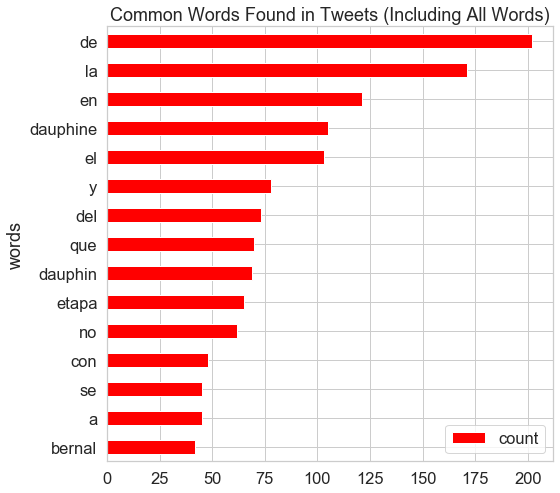

In [22]:
#Ahora, imprimamos en un Plot de Barras:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dfPalabras.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [23]:
#como vemos muchas palabras de conexión, vamos a eliminarlos de nuestro set de datos.
nltk.download('stopwords')
palabras_conexion = set(stopwords.words('spanish'))
list(palabras_conexion)[0:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eordjai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['donde',
 'nuestra',
 'tuviera',
 'estamos',
 'durante',
 'nosotros',
 'tenga',
 'os',
 'habíamos',
 'tuviesen']

In [24]:
# Quitemos las palabras de conexión de nuestra lista
tweetsLimpios = [[word for word in tweet_words if not word in palabras_conexion]
              for tweet_words in palabrasEnTweet]

tweetsLimpios[0]

['dauphin',
 '50',
 'km',
 'pelotn',
 'colombianos',
 'est',
 '416',
 'grupo',
 '15',
 'fugados',
 'vivo',
 'envivo']

In [25]:
#Volvamos a sacar la cantidad de palabras de la muestra quitando las palabras de conexión
nuevoPalabrasTweetSinURL = list(itertools.chain(*tweetsLimpios))

nuveoConteo = collections.Counter(nuevoPalabrasTweetSinURL)

nuveoConteo.most_common(15)

[('dauphine', 105),
 ('dauphin', 69),
 ('etapa', 65),
 ('bernal', 42),
 ('4', 35),
 ('egan', 31),
 ('hoy', 29),
 ('cada', 26),
 ('cuarta', 22),
 ('buchmann', 22),
 ('critrium', 21),
 ('est', 20),
 ('roglic', 20),
 ('fuga', 20),
 ('eganbernal', 19)]

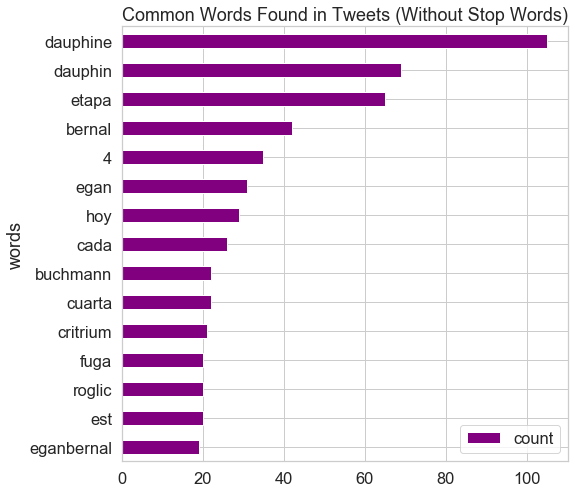

In [26]:
#Volvemos a pintar 
dfPalabrasNuevo = pd.DataFrame(nuveoConteo.most_common(15),
                             columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dfPalabrasNuevo.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop Words)")

plt.show()

In [27]:
#Ahora, como la tendencia que estamos buscando es #VotoMilitarEs es lógico que sea la palabra que más se encuentre,
#por eso, vamos a quitarlo de la muestra
palabrasBusqueda = ['dauphin', 'dauphine']
nuevoPalabrasTweetSinPB = [[word for word in tweet_words if not word in palabrasBusqueda]
              for tweet_words in tweetsLimpios]

In [28]:
# Flatten list of words in clean tweets
soloPalabrasSinPBniURLniPC = list(itertools.chain(*nuevoPalabrasTweetSinPB))

# Create counter of words in clean tweets
nuevoConteoLimpio = collections.Counter(soloPalabrasSinPBniURLniPC)

nuevoConteoLimpio.most_common(15)

[('etapa', 65),
 ('bernal', 42),
 ('4', 35),
 ('egan', 31),
 ('hoy', 29),
 ('cada', 26),
 ('cuarta', 22),
 ('buchmann', 22),
 ('critrium', 21),
 ('est', 20),
 ('roglic', 20),
 ('fuga', 20),
 ('eganbernal', 19),
 ('kruijswijk', 19),
 ('salida', 17)]

In [29]:
nuevoDFLimpioPalabras = pd.DataFrame(nuevoConteoLimpio.most_common(15),
                             columns=['words', 'count'])
nuevoDFLimpioPalabras.head()

,words,count
0,etapa,65
1,bernal,42
2,4,35
3,egan,31
4,hoy,29


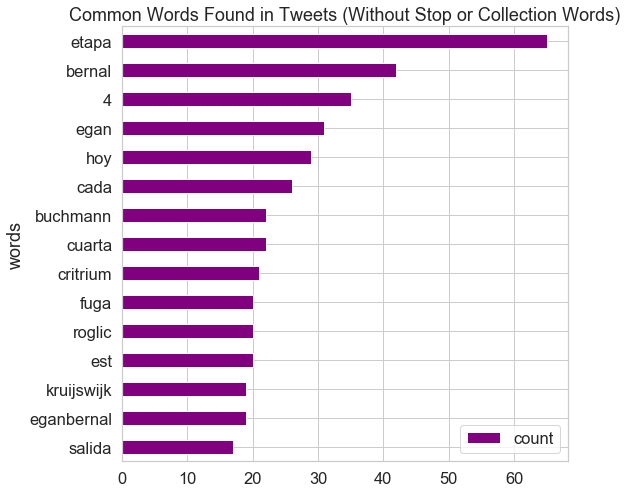

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
nuevoDFLimpioPalabras.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()